In [2]:
# Creating a function

b = 4
f(x) = b*x

f(6)


24

This is the mathematical model of the SIR project 

Susceptibles 
+   S(ti+1) = S(ti) - AS(ti)I(ti)dt   

Infected 
+   I(ti+1) = I(ti) + AS(ti)I(ti)dt - YI(ti)dt

Removed
+   R(ti+1) = R(ti) + YI(ti)dt

In [3]:
function UpdateSIR(popnvector)
    susceptible = popnvector[1];
    infected    = popnvector[2];
    removed     = popnvector[3];
    newS = susceptible - lambda * susceptible * infected * dt
    newI = infected + lambda * susceptible * infected * dt - gam * infected *dt
    newR = removed + gam * infected *dt
    return [newS newI newR]
end 


UpdateSIR (generic function with 1 method)

In [6]:
dt = 0.5
lambda = 1/200
gam = 1/10

# We'll the specify the input vector to the fuction 
s, i, r = 1000., 10, 20
vec = [s i r]

UpdateSIR(vec)  # Calling the function 


1×3 Matrix{Float64}:
 975.0  34.5  20.5

In [14]:
dt = 0.5
lambda = 1/20000
gam = 1/10
tfinal = 610
s0 = 10000.0
i0  = 4.
r0 = 0.


# Initialize current run 
nsteps = round(Int64, tfinal/dt)
resultvals = Array{Float64}(undef, nsteps+1, 3)
timevec = Array{Float64}(undef, nsteps+1)
resultvals[1, :] = [s0, i0, r0]
timevec[1] = 0.

# Execute the current run 
for step = 1:nsteps
    resultvals[step+1, :] = UpdateSIR(resultvals[step, :])
    timevec[step+1] = timevec[step] + dt
end

In [15]:
using Plots
gr()


Plots.GRBackend()

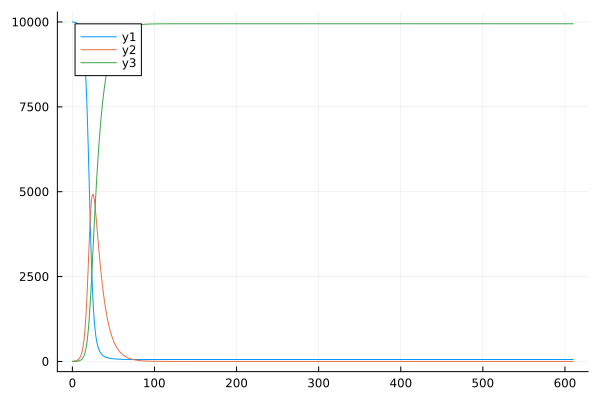

In [16]:
plot(timevec, resultvals)

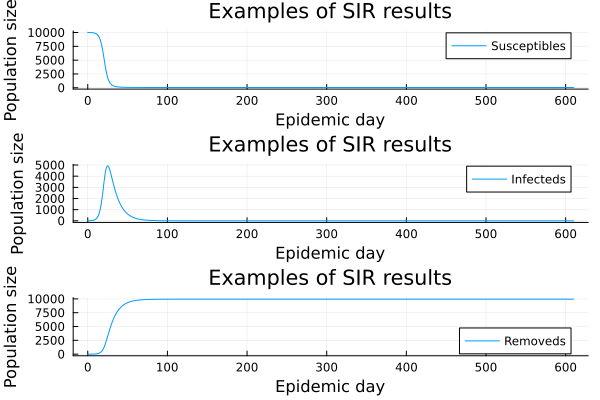

In [25]:
plot(timevec, resultvals, layout = (3,1),
title = "Examples of SIR results",
xlabel = "Epidemic day",
ylabel = "Population size",
label = ["Susceptibles" "Infecteds" "Removeds"]
)

In [26]:
function UpdateSIR(popnvector)
    susceptible = popnvector[1];
    infected    = popnvector[2];
    removed     = popnvector[3];
    newS = susceptible - lambda * susceptible * infected * dt
    newI = infected + lambda * susceptible * infected * dt - gam * infected *dt
    newR = removed + gam * infected *dt
    return [newS newI newR]
end 

UpdateSIR (generic function with 1 method)

In [31]:
dt = 0.5
lambda = 0.0005
gam = 1/20
tfinal = 610
s0 = 150.
i0  = 4.
r0 = 0.


# Initialize current run 
nsteps = round(Int64, tfinal/dt)
resultvals = Array{Float64}(undef, nsteps+1, 3)
timevec = Array{Float64}(undef, nsteps+1)
resultvals[1, :] = [s0, i0, r0]
timevec[1] = 0.

# Execute the current run 
for step = 1:nsteps
    resultvals[step+1, :] = UpdateSIR(resultvals[step, :])
    timevec[step+1] = timevec[step] + dt
end

In [32]:
using Plots
gr()

Plots.GRBackend()

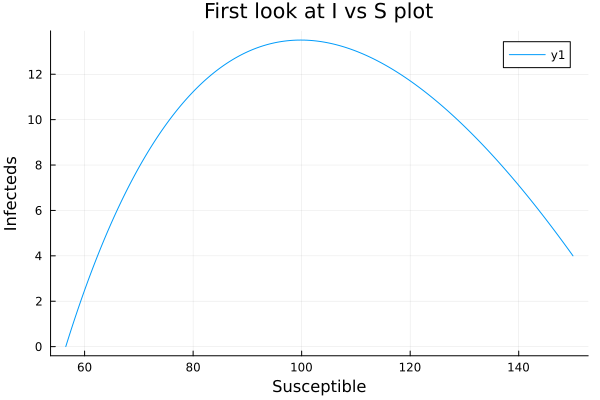

In [33]:
svals = resultvals[:, 1]
ivals = resultvals[:, 2]

plot(svals, ivals,
title = "First look at I vs S plot",
xlabel = "Susceptible",
ylabel = "Infecteds"
)